In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Predict the next day’s high and low temperature for each location with accuracy and other metrics.

Now, let's start doing the research, and let's get a hypothesis going. 

Source: https://www.visualcrossing.com/weather/weather-data-services#

1. CLeaning and organizing data

In [42]:
old = pd.read_csv("aug23_to_may24.csv")
new = pd.read_csv("may23_to_jul23.csv")

In [50]:
old["snow"].unique()

array([ 0. ,  0.3,  2. ,  0.1,  3. ,  5.1,  0.5,  0.2,  0.9,  1.4,  0.7,
        2.3,  0.6,  1.3,  2.1,  4.5,  2.4,  1.5,  4.8,  1.1,  2.7,  2.6,
        7.8,  1.6, 13.6,  3.4,  4.1,  0.4,  2.5,  8.2,  7. ,  3.3,  3.1,
        3.8, 10.5,  1.2,  1. , 12.5,  2.8,  3.2, 10.2,  0.8, 10.3, 17.3,
       24.8,  1.7,  5.4,  5.8, 11.1,  1.8,  5.9,  9.2,  9. ])

snow
0    828
Name: count, dtype: int64

In [39]:
old.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [40]:
new.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [59]:
new["snow"] = new["snow"].astype(float)
new["snowdepth"] = new["snowdepth"].astype(float)
# new["severerisk"] = new["severerisk"].astype(int)

In [60]:
may23_may24 = new.merge(old, how="outer")

In [65]:
may23_may24[may23_may24["datetime"] <= "2023-05-01"]

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Beijing,2023-05-01,25.2,8.0,18.1,25.2,8.0,18.1,8.1,54.7,...,26.2,9.0,10.0,2023-05-01T05:15:37,2023-05-01T19:08:22,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"ZBAA,54511099999"
381,Berlin,2023-05-01,18.9,3.4,11.9,18.9,0.9,11.1,2.6,55.8,...,21.5,8.0,NaN,2023-05-01T05:35:55,2023-05-01T20:32:34,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"00427,00420,03987,00403,E2835,00433,00400"
762,London,2023-05-01,17.6,11.3,14.3,17.6,11.3,14.3,7.8,65.7,...,8.3,5.0,NaN,2023-05-01T05:33:03,2023-05-01T20:23:24,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"03680099999,D5621,03672099999,03781099999,0377..."
1143,Mexico City,2023-05-01,32.1,5.0,21.2,29.9,3.2,20.7,-0.2,27.0,...,27.2,10.0,10.0,2023-05-01T06:08:10,2023-05-01T18:59:26,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"76726099999,76675399999,76679399999,remote,MMS..."
1524,Moscow,2023-05-01,9.2,3.4,6.6,6.4,0.0,3.7,3.8,83.0,...,NaN,NaN,NaN,2023-05-01T04:47:35,2023-05-01T20:07:12,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"UUMO,UUWW,UUEE,27515599999,27518599999"
1905,Ottawa,2023-05-01,9.9,6.8,8.3,9.9,2.3,5.5,6.0,85.6,...,7.2,4.0,10.0,2023-05-01T05:51:24,2023-05-01T20:09:15,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"CXKE,E2286,71063099999,71628099999,71300099999"
2286,Paris,2023-05-01,15.7,10.6,13.0,15.7,10.6,13.0,8.5,74.7,...,6.3,3.0,NaN,2023-05-01T06:30:53,2023-05-01T21:05:42,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"07149099999,07156099999,07146099999,0715709999..."
2667,Rome,2023-05-01,19.1,14.1,16.0,19.1,14.1,16.0,13.8,87.5,...,8.0,4.0,NaN,2023-05-01T06:06:49,2023-05-01T20:08:17,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"F8377,16242099999,16239099999,16219099999,AT41..."
3048,Washington DC,2023-05-01,16.0,9.9,13.7,16.0,8.2,13.6,3.4,50.6,...,7.8,3.0,10.0,2023-05-01T06:10:34,2023-05-01T20:00:36,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,D6279,KADW,KDAA,7..."


In [67]:
# may23_may24.to_csv("full_year-may23-may24.csv", index=False)

In [68]:
nulls = may23_may24.apply(pd.isnull).sum()
nulls

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1583
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation       276
solarenergy          276
uvindex              276
severerisk          1380
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               9
dtype: int64

In [10]:
# both.index = pd.to_datetime(both.index)
both.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [11]:
# weather.index.month.value_counts().sort_index()
weather = both[['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description']].copy()

<Axes: >

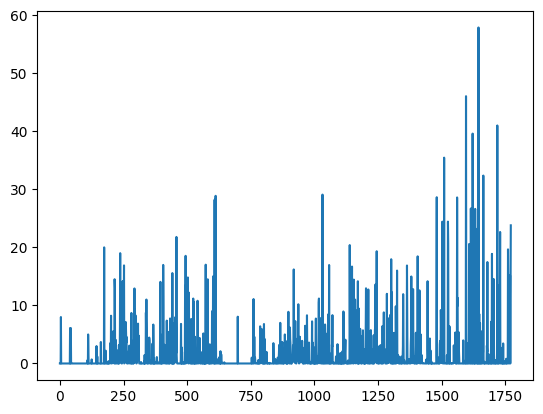

In [12]:
weather["precip"].plot()

In [13]:
weather["target"] = weather.shift(-1)["tempmax"]
weather

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,target
0,Beijing,2023-11-01,22.6,9.0,15.4,22.6,7.3,15.3,12.2,83.0,...,2.6,148.3,12.6,6.0,2023-11-01T06:42:32,2023-11-01T17:13:02,0.61,Clear,Clear conditions throughout the day.,22.0
1,Beijing,2023-11-02,22.0,14.0,17.0,22.0,14.0,17.0,8.2,61.8,...,5.9,140.3,12.2,5.0,2023-11-02T06:43:40,2023-11-02T17:11:52,0.64,Clear,Clear conditions throughout the day.,18.0
2,Beijing,2023-11-03,18.0,11.0,14.2,18.0,11.0,14.2,2.0,45.1,...,12.3,130.3,11.2,5.0,2023-11-03T06:44:48,2023-11-03T17:10:42,0.67,Partially cloudy,Partly cloudy throughout the day.,16.1
3,Beijing,2023-11-04,16.1,10.0,12.4,16.1,10.0,12.4,5.4,63.1,...,10.5,118.0,10.1,5.0,2023-11-04T06:45:57,2023-11-04T17:09:34,0.70,Partially cloudy,Partly cloudy throughout the day.,11.8
4,Beijing,2023-11-05,11.8,7.9,10.4,11.8,3.3,9.4,6.1,78.3,...,9.9,10.5,0.8,0.0,2023-11-05T06:47:05,2023-11-05T17:08:28,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Washington DC,2024-05-11,18.8,9.1,13.6,18.8,7.8,13.3,7.5,68.7,...,15.4,198.2,17.0,10.0,2024-05-11T05:58:52,2024-05-11T20:10:47,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,19.3
1769,Washington DC,2024-05-12,19.3,10.5,15.1,19.3,10.5,15.1,8.7,68.0,...,15.6,141.4,12.1,8.0,2024-05-12T05:57:55,2024-05-12T20:11:42,0.15,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,24.3
1770,Washington DC,2024-05-13,24.3,10.9,17.8,24.3,10.9,17.8,10.9,67.0,...,15.8,220.6,19.1,9.0,2024-05-13T05:56:59,2024-05-13T20:12:37,0.18,Partially cloudy,Partly cloudy throughout the day.,21.2
1771,Washington DC,2024-05-14,21.2,16.5,18.5,21.2,16.5,18.5,15.0,80.5,...,12.9,63.4,5.7,2.0,2024-05-14T05:56:05,2024-05-14T20:13:32,0.21,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,18.4


In [14]:
from sklearn.linear_model import Ridge

In [15]:
weather["name"].value_counts()

name
Beijing          197
Berlin           197
London           197
Mexico City      197
Ottawa           197
Rome             197
Washington DC    197
Moscow           105
Paris            105
Moscow            92
Paris             92
Name: count, dtype: int64

- What determines the next day's high and low temperature for each location?

- What do you see from the data at first glance that might impact this?

- How would you need to organize and clean your data?

- Is your model 'universal', meaning does it apply to every location the same (no variance) when it comes to these predictions?

- If not, what factors impact your model?

- What tools or metrics will you need to use to account for these changes?

- Is your model accurate? What causes the inaccuracy, if any?